## Bayes' Theorem Example: Monty Hall Problem (or "Deal Or No Deal") <a class="anchor" id="five"></a>

A very famous stats mind trick... You might have seen this already.

The [Monty Hall Problem](https://en.wikipedia.org/wiki/Monty_Hall_problem) was originally posed (and solved) in a letter by Steve Selvin to the American Statistician in [1975](https://www.tandfonline.com/doi/abs/10.1080/00031305.1975.10479121). It became famous as a question from reader Craig F. Whitaker's letter quoted in Marilyn vos Savant's "Ask Marilyn" column in Parade magazine in 1990


You are playing a TV game show and are shown 2 doors.  One has a car behind it, the other a goat.  What are your chances of picking the door with the car?

OK, now there are 3 doors: one with a car, two with goats.  The game show host asks you to pick a door, but not to open it yet.  Then the host opens one of the other two doors (that you did not pick) and that has a goat.  The host offers you the opportunity to switch doors.

- One player decides to switch
- Another player prefers to stay with the previous choice
 
![https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/180px-Monty_open_door.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/180px-Monty_open_door.svg.png)

- Now a third player comes in who has not seen what happened earlier. They pick a door.

*Which of the three players is most likely to win?*

You might know or remember the answer already... but don't think now! **Let's simulate it**. 


## Time to get you hands dirty! Open a jupyter notebook and code it up! 

### Simulate the Monty Hall Problem

- Simulate three doors, one car, and two goats.
 - Simulate three players: the switcher, the conservative, and the newcomer. 
 - Record who wins.
 - Repeat it many times.
 - Which player do you want to be?
 
 - What would happen if you had 100 doors to choose from and the presenter opens 98 or them?
 
- And what if you had $N$ doors to choose from and the presenter opens $M\leq N-2$ of them? Study how the probability of winning changes as a function of $M$ and $N$.

### Pdf of the log
1. Use `numpy` to draw $N$ (where $N$ is large...) random samples from a uniform distribution between $0.1$ and $10$, and store these samples as $x$.
2. Use matplotlib to make a histogram of these samples.
3. Compute the base-10 log of your array $x$, and store this as $y$.
4. Make another histogram for $y$. Using the equation to transform probability distributions, write what the theoretical pdf of $y$ is, and overplot it onto your histogram.
5. Compute the log of the mean of $x$ and the mean of $y$. Now compute the log of the median of $x$ and the median of $y$. 

You should note that the means are different, but the medians (as it is a cumulative statistic) are the same. The mean is affected by the scale of the sample values, but the median only depends on the ordering of the samples. Monotonic transformations (like taking the log) do not change the ordering of samples.
 

## Monty hall problem

In [1]:
import numpy as np
from random import randint
import random as rn

In [2]:
def doors_opening (doors, rem_number):

    # I know that the winning door and player's door are 1 and 2, I just put 
    # them the end 
    doors = np.sort(doors)

    # after the player pick a door, the presenter removes the doors requested
    doors = doors[rem_number:]

    return doors

In [3]:
print("Provide the number of doors: ")
N = int(input())

print("Provide the number of games: ")
Games = int(input())

print("Provide the number of removed doors: ")
M = int(input())


Provide the number of doors: 


 3


Provide the number of games: 


 1000


Provide the number of removed doors: 


 1


In [4]:
first_player_wins = 0
second_player_wins = 0
third_player_wins = 0

for i in range(Games):

    doors = np.zeros(N)
    winning_door = randint(0, N-1)
    selected_door = randint(0, N-1)

    doors[winning_door] = 1
    doors[selected_door] = 2
    
    # ordered remaining doors: (goat ... car, choice) or maybe: (goat ... , choice and car)
    last_doors = doors_opening(doors, M)

    selected_door = len(last_doors) - 1 # last index
    
    if last_doors[-2] == 0: 
        winning_door = len(last_doors) - 1
    else: 
        winning_door = len(last_doors) - 2
        
    # Player one:
    # he doesn't switch the door, it's wiining probability is just the original one
    if winning_door == selected_door:
        first_player_wins += 1

    # Player two:
    # he switches the door with just one of the others left open:
    new_door = randint(0, (len(last_doors) - 2)) # The last one is the first door he picked!
    if new_door == winning_door:
        second_player_wins += 1

    # Player three:
    # He doesn't know anything of what happen before, he just pick a door 
    # from the one left
    third_door = randint(0, (len(last_doors) - 1))
    if third_door == winning_door:
        third_player_wins += 1


print('The game is played')

The game is played


In [5]:
print("First player's winning probability: ", first_player_wins/Games)
print("Second player's winning probability: ", second_player_wins/Games)
print("Third player's winning probability: ", third_player_wins/Games)

First player's winning probability:  0.347
Second player's winning probability:  0.653
Third player's winning probability:  0.479


# PDF of the log

In [6]:
import numpy as np
import matplotlib.pyplot as plt

Compute the pdf using the transformation, f is the pdf function:

$$ f(y) = f(x)\left|\frac{dx}{dy}\right| = \frac{1}{x_{max}-x_{min}}\left|10^y log(10)\right|$$ 

Now I can implement it in the code

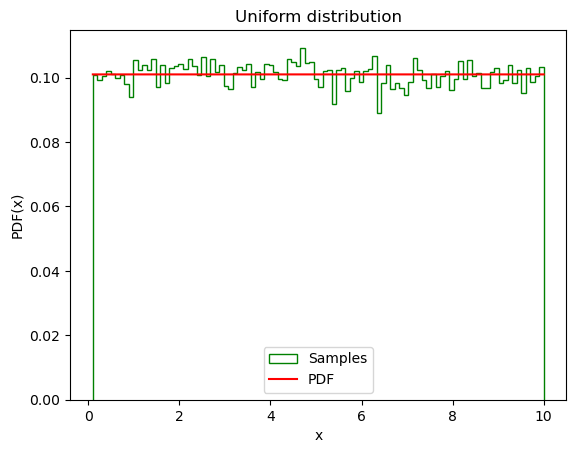

In [7]:
N = 100000

#Sampling of the two variables
x = np.random.uniform(0.1, 10, N)
y = np.log10(x)

#grids for drawing the PDFs
data_grid = np.linspace(-1, 1, 10000)
data_grid_uniform = np.linspace(0.1, 10, 10000)

#PDFs
Transf_pdf = 10**data_grid * np.log(10) * 1/(10 - 0.1)
Uniform_pdf = np.full_like(data_grid_uniform, 1/(10 - 0.1))

#Drawing the histograms
plt.hist(x, bins = 100, density = True, color = 'g', histtype='step', label = 'Samples')
plt.plot(data_grid_uniform, Uniform_pdf, color = 'red', label = 'PDF')
plt.title('Uniform distribution')
plt.ylabel('PDF(x)')
plt.xlabel('x')
plt.legend()
plt.show()


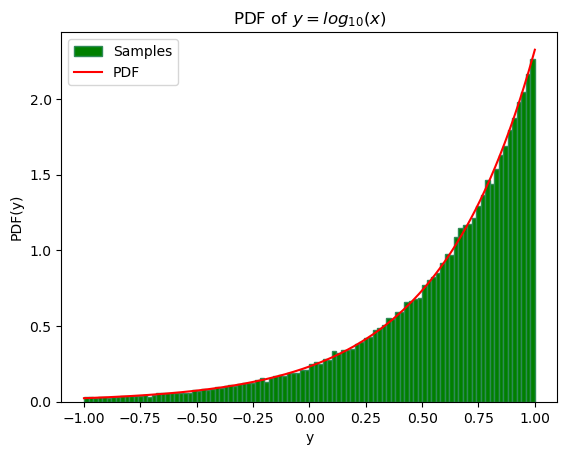

In [8]:
plt.hist(y, 100, density = True, color='g', edgecolor= 'seagreen', label = 'Samples')
plt.title('PDF of $y = log_{10}(x)$')
plt.ylabel('PDF(y)')
plt.xlabel('y')
plt.plot(data_grid, Transf_pdf, color = 'red', label = 'PDF')
plt.legend()
plt.show()

In [9]:
#Stats

print('Log of the mean of x: %0.3f' %(np.log10(np.mean(x))))
print('Mean of y: %0.3f' %(np.mean(y)))

print('Log of the median of x: %0.3f' %(np.log10(np.median(x))))
print('Median of y: %0.3f' %(np.median(y)))


Log of the mean of x: 0.702
Mean of y: 0.584
Log of the median of x: 0.699
Median of y: 0.699


# Example 2

I see that the median remains the same, instead the mean is changing.
This is true only for monotonic transformations, if I try with something not monotonic between an interval, it will be something different.
Let's use for example the function: $$ y = x^2. $$ 
The interval is [-3, 3] and x is uniform. The transformed pdf:  $$ f(y) = \frac{1}{x_{max} - x_{min}} \frac{1}{2} \left| \frac{1}{\sqrt y} \right| $$ 

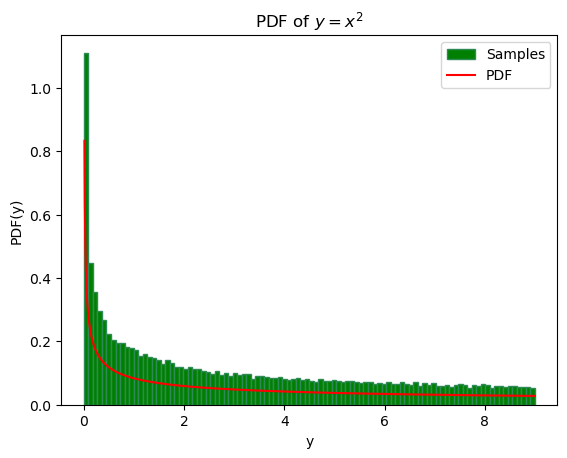

In [12]:
N = 50000

x = np.random.uniform(-3, 3, N)
y = x**2

# Grids
data_grid = np.linspace(0.01, 9, 10000)
data_grid_uniform = np.linspace(-3, 3, 10000)

#PDFs
Transf_pdf = 1/(np.sqrt(data_grid)) * 0.5 * 1/(3 + 3)
Uniform_pdf = np.full_like(data_grid_uniform, 1/(3 + 3))

plt.hist(y, 100, density = True, color='g', edgecolor= 'seagreen', label = 'Samples')
plt.title('PDF of $y = x^2$')
plt.ylabel('PDF(y)')
plt.xlabel('y')
plt.plot(data_grid, Transf_pdf, color = 'red', label = 'PDF')
plt.legend()
plt.show()

In [11]:
print('Square of the mean of x: %0.3f' %((np.mean(x))**2))
print('Mean of y: %0.3f' %(np.mean(y)))

print('Square of the median of x: %0.3f' %((np.median(x))**2))
print('Median of y: %0.3f' %(np.median(y)))

Square of the mean of x: 0.000
Mean of y: 2.999
Square of the median of x: 0.000
Median of y: 2.247


Here I see that both the mean and the median change because of the transformation